# Анализ белгородских мест общесвтенного питания

### Анализ производится из данных, которые удалось собрать при парсинге yandex карт

In [163]:
import numpy as np 
import pandas as pd 
import scipy.stats as sts 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [164]:
df = pd.read_csv('data/belgorod_food_places.csv', index_col='name')
df.head()

,Unnamed: 0,adress,rait,rait_count,link,closing_time,category
name,,,,,,,
Farfor,0,"Харьковский пер., 36Д, Белгород",4.3,391 оценка,https://yandex.ru/maps/org/farfor/73233893783,Открыто до 23:00,Доставка еды и обедов
Перчини Grill&Wine,1,"просп. Славы, 90А, Белгород",4.5,(2416),https://yandex.ru/maps/org/perchini_grill_wine...,Открыто до 23:00,Ресторан
Ниндзя ФУД,2,"ул. Костюкова, 39, Белгород",4.7,(651),https://yandex.ru/maps/org/nindzya_fud/1868725...,Открыто до 23:00,Кафе
Дао,3,"Харьковская ул., 3, Белгород, этаж 1",4.4,407 оценок,https://yandex.ru/maps/org/dao/17169128887,Открыто до 22:00,Ресторан
Тшм,4,"Белгородский просп., 93, Белгород",3.7,239 оценок,https://yandex.ru/maps/org/tshm/190737174920,Круглосуточно,Быстрое питание


## Колонки 
* *name* - наименование заведения общественного питания 

* *Unnamed* - будел удалена

* *adress* - адрес заведения

* *rait* - рейтинг заведения по 5-ти балльной шкале

* *rait_count* - количесвто оценок

* *link* - ссылка на заведение в яндекс картах

* *closing_time* - время закрытия

* *category* - категория зведения  

In [165]:
df = df.drop(df.columns[[0]], axis=1)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, Farfor to Кафе шашлычная Сытое пузо
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   adress        213 non-null    object 
 1   rait          212 non-null    float64
 2   rait_count    212 non-null    object 
 3   link          212 non-null    object 
 4   closing_time  215 non-null    object 
 5   category      213 non-null    object 
dtypes: float64(1), object(5)
memory usage: 11.8+ KB


In [167]:
df.describe()

,rait
count,212.000000
mean,4.306132
std,0.448917
min,1.600000
25%,4.100000
50%,4.300000
75%,4.500000
max,5.000000


In [168]:
df.describe(include='object')

,adress,rait_count,link,closing_time,category
count,213,212,212,215,213
unique,194,185,210,28,19
top,"ул. Победы, 71, Белгород",153 оценки,https://yandex.ru/maps/org/farfor/73233893783,Открыто до 23:00,Быстрое питание
freq,3,4,2,43,56


In [169]:
df.rait.value_counts()

rait
4.3    30
4.4    30
4.1    23
4.2    23
4.5    19
4.0    17
5.0    13
4.9    10
4.7     9
3.9     9
4.8     8
4.6     7
3.8     5
3.7     2
3.6     2
3.4     1
1.6     1
2.0     1
2.2     1
2.7     1
Name: count, dtype: int64

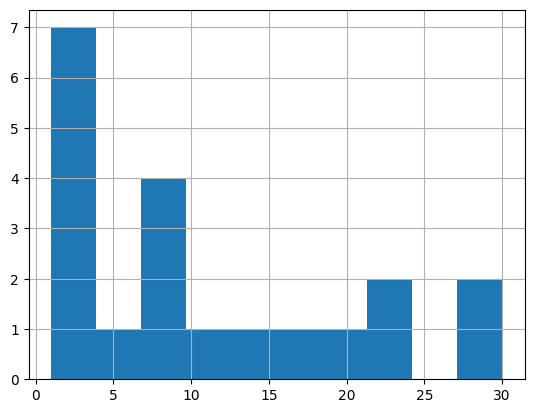

In [170]:
df.rait.value_counts().hist();

In [171]:
df.closing_time.value_counts()

closing_time
Открыто до 23:00           43
Открыто до 22:00           42
Открыто до 00:00           25
Круглосуточно              21
Открыто до 20:00           18
Открыто до 21:00           13
Открыто до 22:30            7
График работы не указан     6
Закрыто до завтра           6
Открыто до 21:30            4
Открыто до 17:00            4
Открыто до 22:45            3
Открыто до 01:00            3
Открыто до 18:00            2
До закрытия 30 мин          2
Открыто до 02:00            2
Организация переехала       2
Закрыто до 20:00            2
Открыто до 01:45            1
Открыто до 21:45            1
Открыто до 23:30            1
Открыто до 00:02            1
Открыто до 21:41            1
До открытия 30 мин          1
Открыто до 21:40            1
Открыто до четверга         1
Временно не работает        1
Открыто до 19:00            1
Name: count, dtype: int64

In [172]:
df.category.value_counts()

category
Быстрое питание                         56
Кафе                                    30
Доставка еды и обедов                   28
Ресторан                                28
Пиццерия                                18
Суши-бар                                14
Бар, паб                                 8
Кофейня                                  8
Столовая                                 4
Магазин кулинарии                        3
Караоке-клуб                             2
Кондитерская                             2
Диетические и диабетические продукты     2
Магазин суши и роллов                    2
Магазин пива                             2
Магазин продуктов                        2
Пекарня                                  2
Кейтеринг                                1
Комбинат питания                         1
Name: count, dtype: int64

In [173]:
df.rait.isnull().sum()

np.int64(3)

In [174]:
df[df['rait'].isnull()]

,adress,rait,rait_count,link,closing_time,category
name,,,,,,
Обеды в офис г. Белгород,"ул. 60 лет Октября, 2В, 10-й микрорайон, Белгород",NaN,NaN,NaN,Организация переехала,Доставка еды и обедов
Кебаб,"Привольная ул., 1А, Белгород",NaN,NaN,NaN,Круглосуточно,Быстрое питание
Принц Пирогов,"Гражданский просп., 18, Белгород",NaN,NaN,NaN,Организация переехала,Пекарня


## Думая можно выбросить из датасета данных сомнительные заведения

In [175]:
df = df[~df['rait'].isnull()]
df['rait'] = df['rait'].astype(float)
df.rait.isnull().sum()

np.int64(0)

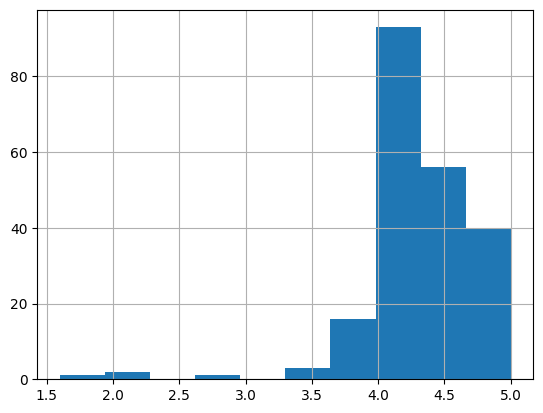

In [176]:
df = df[~df['rait'].isnull()]
df['rait'] = df['rait'].astype(float)
df.rait.hist();

## Теперь приведем в порядок время закрытия

### Избавимся от выбросов в виде "оргинизация переехала", "закрыто до четверга" и т.п.

График работы не указан     6
Закрыто до завтра           6
Открыто до 21:30            4
Открыто до 17:00            4
Открыто до 22:45            3
Открыто до 01:00            3
Открыто до 18:00            2
До закрытия 30 мин          2
Открыто до 02:00            2
Организация переехала       2
Закрыто до 20:00            2
Открыто до 01:45            1
Открыто до 21:45            1
Открыто до 23:30            1
Открыто до 00:02            1
Открыто до 21:41            1
До открытия 30 мин          1
Открыто до 21:40            1
Открыто до четверга         1
Временно не работает        1
Открыто до 19:00            1

In [177]:
bad_data = [
    'График работы не указан', 'Закрыто до завтра', 
    'До закрытия 30 мин', 'Организация переехала',
    'Закрыто до 20:00', 'До открытия 30 мин', 
    'Открыто до четверга', 'Временно не работает'
]

df = df[~df['closing_time'].isin(bad_data)]

def convert_to_time(closing_time):
    if closing_time == "Круглосуточно":
        return pd.to_datetime("12:12", format="%H:%M").time()
    elif "Открыто до" in closing_time:
        time_str = closing_time.split(" ")[-1]
        return pd.to_datetime(time_str, format="%H:%M").time()
    return None

df['closing_time'] = df['closing_time'].apply(convert_to_time)

df = df.dropna()

df['closing_time'] = df['closing_time'].apply(lambda x: x.strftime('%H:%M'))

print(df['closing_time'].value_counts())


closing_time
23:00    43
22:00    42
00:00    25
12:12    20
20:00    17
21:00    10
22:30     7
21:30     4
17:00     4
22:45     3
01:00     3
02:00     2
18:00     2
23:30     1
01:45     1
21:45     1
00:02     1
21:41     1
21:40     1
19:00     1
Name: count, dtype: int64


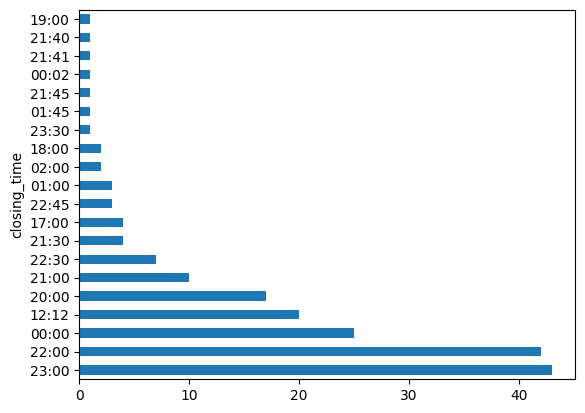

In [178]:
df.closing_time.value_counts().plot(kind='barh');

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, Farfor to Кафе шашлычная Сытое пузо
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   adress        189 non-null    object 
 1   rait          189 non-null    float64
 2   rait_count    189 non-null    object 
 3   link          189 non-null    object 
 4   closing_time  189 non-null    object 
 5   category      189 non-null    object 
dtypes: float64(1), object(5)
memory usage: 10.3+ KB
